<a href="https://colab.research.google.com/github/eneaiten/Codes_MT/blob/main/150min_Cosmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Carica il file senza header
file = "/content/ES_04_150min_Cosmed_PLA.xlsx"
gxt_raw = pd.read_excel(file, header=None)

# Trova la riga header ("t")
start_row = gxt_raw[
    gxt_raw.apply(lambda r: r.astype(str).str.strip().str.lower() == "t").any(axis=1)
].index[0]

# Trova la colonna "t"
t_col_idx = gxt_raw.iloc[start_row].astype(str).str.strip().str.lower().eq("t").idxmax()

# Prendi solo le colonne da "t" in poi
sub_gxt = gxt_raw.iloc[start_row:, t_col_idx:].copy()

# Trova la prima riga con almeno un numero sotto l'header
def is_real_number(x):
    try:
        float(x)
        return True
    except:
        return False

numeric_start_rel = sub_gxt.iloc[1:, :].applymap(is_real_number).any(axis=1).idxmax()
numeric_start = numeric_start_rel  # indice relativo a sub_gxt

# Taglio righe iniziali non numeriche
clean_rows = sub_gxt.iloc[numeric_start:, :].copy()

# Rimuove colonne completamente vuote in fondo
# axis = 1 applica dropna alle colonne, se fosse stato axis=0 lo avrebbe fatto sulle righe
# how ='all' elimina se tutti i valori sono NaN, how ='any' elimina la colonna se almeno un valore è NaN
clean = clean_rows.dropna(axis=1, how='all')

# Imposta header dai titoli originali (start_row)
# t_col_idx + clean.shape[1] indice finale esclusivo, corrispondente al numero di colonne rimaste in clean
# shape[1] restituisce il numero di colonne di clean
headers = gxt_raw.iloc[start_row, t_col_idx:t_col_idx + clean.shape[1]].tolist()
clean.columns = headers

# Rimuove eventuali righe finali completamente vuote
clean = clean.dropna(how='all').reset_index(drop=True)

# Mostra tabella pulita
display(clean)
display(clean.info())


/tmp/ipython-input-2132833432.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_start_rel = sub_gxt.iloc[1:, :].applymap(is_real_number).any(axis=1).idxmax()


,t,Rf,VT,VE,IV,VO2,VCO2,RQ,O2exp,CO2exp,...,LogVE,t Rel,mark Speed,mark Distance,Phase time,VO2/kg%Pred,BR,VT/Ti,HRR,PaCO2_e
0,00:00:15,22.59,1.169,26.404,1145,0.915544,0.797728,0.87,196.56,43.68,...,1.422,0,0,0,00:00:00,27,0,1.18,135,38.02
1,00:00:30,17.02,1.548,26.357,1402,1.237969,0.968665,0.78,239.45,70.1,...,1.421,15,0,0,00:00:15,36,0,1.27,131,43.08
2,00:14:15,3.66,0.338,1.237,838,0,0.000194,0,71,0.3,...,0.092,825,0,0,00:14:00,0,0,0.07,86,6.59
3,00:16:15,68.21,1.734,118.295,1550,5.068839,4.475051,0.88,273.2,81.516667,...,2.073,120,0,0,00:16:00,147,0,0,87,38.65
4,00:16:30,39.24,2.29,89.856,2284,3.407945,3.184048,0.93,372.944444,100.888889,...,1.954,15,0,0,00:16:15,99,0,2.92,85,41.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,02:34:15,50.03,1.933,96.735,1946,3.63226,3.050381,0.84,318.292308,76.315385,...,1.986,15,0,0,02:34:00,105,0,3.42,68,39.16
205,02:34:30,48,1.87,89.78,1859,3.255851,2.864959,0.88,310.191667,74.658333,...,1.953,15,0,0,02:34:15,94,0,3.24,67,39.41
206,02:34:45,45.71,1.968,89.929,1946,3.22353,2.851159,0.88,327.427273,77.809091,...,1.954,15,0,0,02:34:30,93,0,3.16,68,39.13
207,02:35:00,49.18,1.638,80.549,1626,3.104822,2.601043,0.84,267.866667,66.008333,...,1.906,15,0,0,02:34:45,90,0,2.89,69,39.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   t               209 non-null    object
 1   Rf              209 non-null    object
 2   VT              209 non-null    object
 3   VE              209 non-null    object
 4   IV              209 non-null    object
 5   VO2             209 non-null    object
 6   VCO2            209 non-null    object
 7   RQ              209 non-null    object
 8   O2exp           209 non-null    object
 9   CO2exp          209 non-null    object
 10  VE/VO2          209 non-null    object
 11  VE/VCO2         209 non-null    object
 12  VO2/kg          209 non-null    object
 13  METS            209 non-null    object
 14  HR              209 non-null    object
 15  VO2/HR          209 non-null    object
 16  FeO2            209 non-null    object
 17  FeCO2           209 non-null    object
 18  FetO2     

None

In [ ]:
clean['time'] = (
    clean['t'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second) / 60
)
display(clean)

,t,Rf,VT,VE,IV,VO2,VCO2,RQ,O2exp,CO2exp,...,t Rel,mark Speed,mark Distance,Phase time,VO2/kg%Pred,BR,VT/Ti,HRR,PaCO2_e,time
0,00:00:15,22.59,1.169,26.404,1145,0.915544,0.797728,0.87,196.56,43.68,...,0,0,0,00:00:00,27,0,1.18,135,38.02,0.25
1,00:00:30,17.02,1.548,26.357,1402,1.237969,0.968665,0.78,239.45,70.1,...,15,0,0,00:00:15,36,0,1.27,131,43.08,0.50
2,00:14:15,3.66,0.338,1.237,838,0,0.000194,0,71,0.3,...,825,0,0,00:14:00,0,0,0.07,86,6.59,14.25
3,00:16:15,68.21,1.734,118.295,1550,5.068839,4.475051,0.88,273.2,81.516667,...,120,0,0,00:16:00,147,0,0,87,38.65,16.25
4,00:16:30,39.24,2.29,89.856,2284,3.407945,3.184048,0.93,372.944444,100.888889,...,15,0,0,00:16:15,99,0,2.92,85,41.58,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,02:34:15,50.03,1.933,96.735,1946,3.63226,3.050381,0.84,318.292308,76.315385,...,15,0,0,02:34:00,105,0,3.42,68,39.16,154.25
205,02:34:30,48,1.87,89.78,1859,3.255851,2.864959,0.88,310.191667,74.658333,...,15,0,0,02:34:15,94,0,3.24,67,39.41,154.50
206,02:34:45,45.71,1.968,89.929,1946,3.22353,2.851159,0.88,327.427273,77.809091,...,15,0,0,02:34:30,93,0,3.16,68,39.13,154.75
207,02:35:00,49.18,1.638,80.549,1626,3.104822,2.601043,0.84,267.866667,66.008333,...,15,0,0,02:34:45,90,0,2.89,69,39.4,155.00


In [ ]:
clean.columns = (clean.columns.str.strip().str.lower().str.replace(' ', '_'))
# creo una maschera per i dati che mi interessano
mask = (
    (clean['time']>=17.1) & (clean['time']<=20.1) |
    (clean['time']>=32.1) & (clean['time']<=35.1) |
    (clean['time']>=47.1) & (clean['time']<=50.1) |
    (clean['time']>=62.1) & (clean['time']<=65.1) |
    (clean['time']>=77.1) & (clean['time']<=80.1) |
    (clean['time']>=92.1) & (clean['time']<=95.1) |
    (clean['time']>=107.1) & (clean['time']<=110.1) |
    (clean['time']>=122.1) & (clean['time']<=125.1) |
    (clean['time']>=137.1) & (clean['time']<=140.1) |
    (clean['time']>=152.1) & (clean['time']<=155.1)
)
prolonged_data = clean[mask].reset_index(drop=True)
prolonged_data = prolonged_data[['time','hr','vo2','vco2','ve','ve/vo2','ve/vco2']]
display(prolonged_data)

,time,hr,vo2,vco2,ve,ve/vo2,ve/vco2
0,17.25,136,3.206076,3.088385,93.916,28.3,29.4
1,17.50,134,3.132469,2.861418,82.354,25.3,27.7
2,17.75,133,3.201036,2.91526,84.976,25.6,28.1
3,18.00,134,3.160598,2.775534,76.013,23.3,26.5
4,18.25,136,3.312447,3.041264,87.264,25.5,27.8
...,...,...,...,...,...,...,...
115,154.00,151,2.902847,2.474565,76.629,25.3,29.7
116,154.25,152,3.63226,3.050381,96.735,25.7,30.6
117,154.50,153,3.255851,2.864959,89.78,26.5,30.2
118,154.75,152,3.22353,2.851159,89.929,26.9,30.4


In [ ]:
points_per_step = 12
prolonged_data['Step'] = [i // points_per_step + 1 for i in prolonged_data.index]
prolonged_data['Time'] = [i // points_per_step * 15 + 15 for i in prolonged_data.index]
display(prolonged_data)

,time,hr,vo2,vco2,ve,ve/vo2,ve/vco2,Step,Time
0,17.25,136,3.206076,3.088385,93.916,28.3,29.4,1,15
1,17.50,134,3.132469,2.861418,82.354,25.3,27.7,1,15
2,17.75,133,3.201036,2.91526,84.976,25.6,28.1,1,15
3,18.00,134,3.160598,2.775534,76.013,23.3,26.5,1,15
4,18.25,136,3.312447,3.041264,87.264,25.5,27.8,1,15
...,...,...,...,...,...,...,...,...,...
115,154.00,151,2.902847,2.474565,76.629,25.3,29.7,10,150
116,154.25,152,3.63226,3.050381,96.735,25.7,30.6,10,150
117,154.50,153,3.255851,2.864959,89.78,26.5,30.2,10,150
118,154.75,152,3.22353,2.851159,89.929,26.9,30.4,10,150


In [ ]:
means_step = prolonged_data.groupby('Step').mean().reset_index()
means_step['Time'] = means_step['Time'].astype(int)
subset_means_step = means_step[['Step','Time','hr','vo2','vco2','ve', 've/vo2','ve/vco2']]
display(subset_means_step)

,Step,Time,hr,vo2,vco2,ve,ve/vo2,ve/vco2
0,1,15,134.75,3.159201,2.863769,83.27325,25.491667,28.083333
1,2,30,139.666667,3.185681,2.840527,79.811583,24.258333,27.116667
2,3,45,140.416667,3.193426,2.857964,83.10025,25.116667,28.016667
3,4,60,142.916667,3.066398,2.729442,84.269667,26.45,29.683333
4,5,75,145.416667,3.116184,2.827566,88.636833,27.366667,30.158333
5,6,90,148.166667,3.263813,2.898612,88.158833,26.05,29.316667
6,7,105,145.75,3.129493,2.746792,86.731417,26.65,30.333333
7,8,120,151.0,3.208203,2.820601,89.174333,26.791667,30.458333
8,9,135,152.333333,3.28745,2.875698,90.854167,26.6,30.391667
9,10,150,151.083333,3.249835,2.770462,87.56125,25.875,30.341667


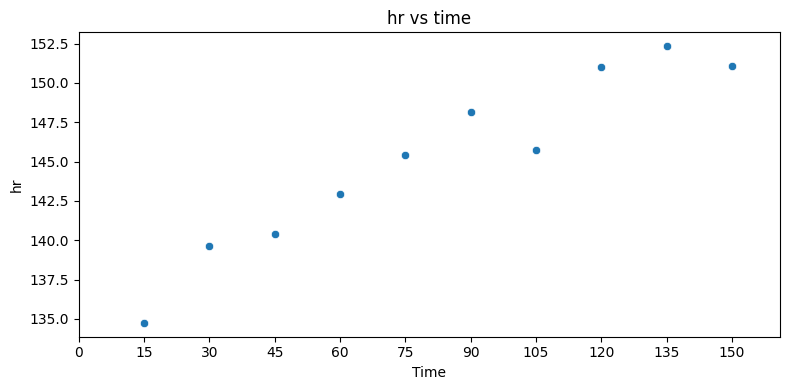

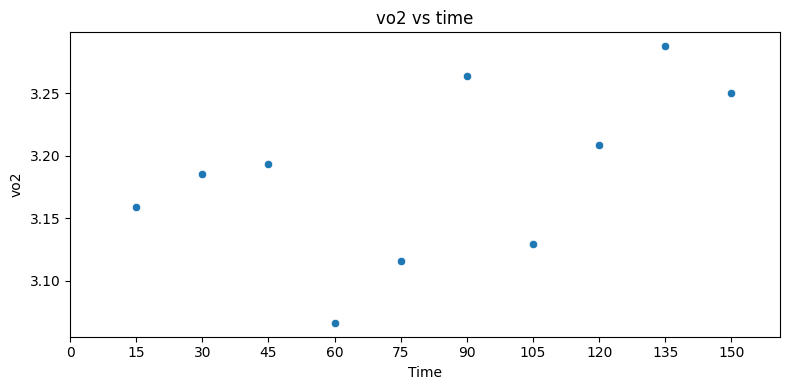

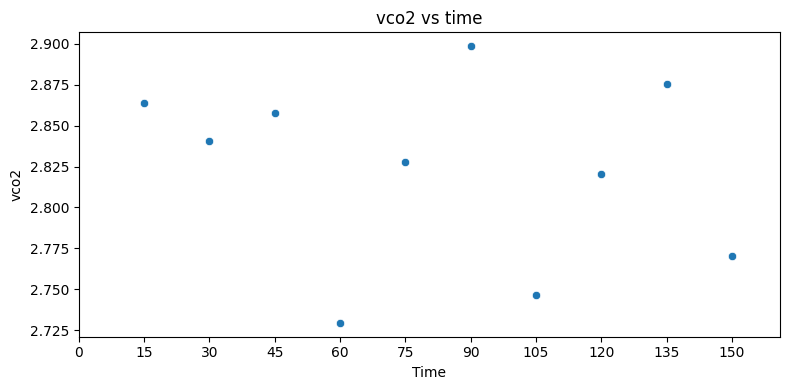

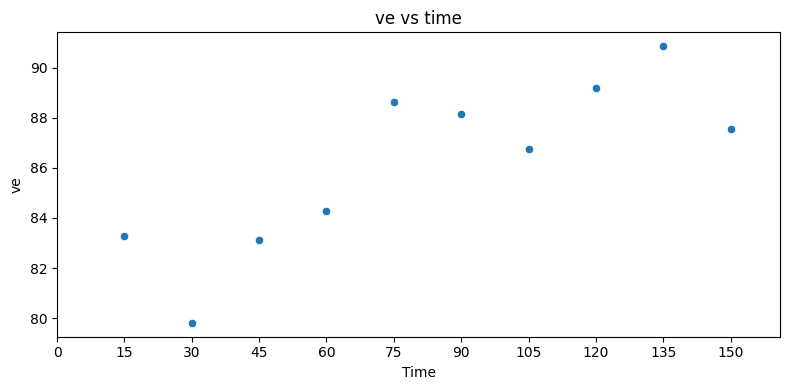

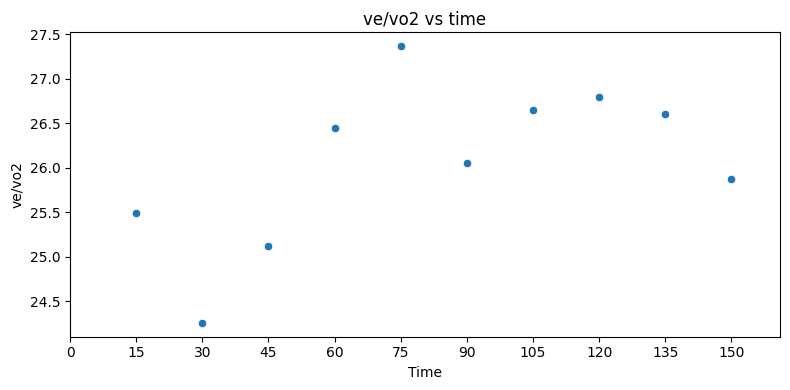

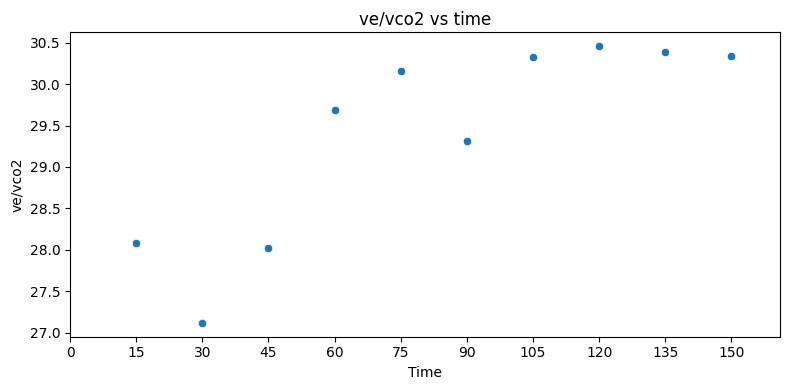

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_cols = [c for c in subset_means_step.columns if c != 'Time' and c!='Step']   # tutte le colonne tranne time e step

for col in y_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=subset_means_step, x='Time', y=col)
    plt.title(f'{col} vs time')
    plt.xlim(0,161)
    plt.xticks(range(0, 161, 15))
    plt.tight_layout()
    plt.show()


In [ ]:
subset_means_step.to_excel('ES_04_hundredfiftymin_PLA.xlsx', index=False)